# Fashion MNIST

- For more information regarding the fashion_mnist dataset, check it out 
[here](https://www.kaggle.com/zalando-research/fashionmnist)


## Loading the packages

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

%load_ext tensorboard
%matplotlib inline

In [2]:
# Clear any logs from previous runs
!rm -r jpt_sample_logs

# Create "jpt_sample_logs" folder if is not existed
if not os.path.exists('jpt_sample_logs'):
    os.makedirs('jpt_sample_logs')

In [3]:
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [4]:
print(X_train_full.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


#### Observation 
- The dataset is split into training and test, however there is validation dataset, so, let's create a validation dataset

In [5]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [6]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat","Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Text(0.5, 1.0, '1')

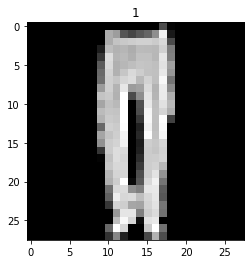

In [7]:
idx = np.random.randint(0,len(X_train))

plt.imshow(X_train[idx], cmap='gray')
plt.title(str(y_train[idx]))

<br>

<br>

## Creating the model

In [8]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Flatten(input_shape=(28,28)))

model.add(tf.keras.layers.Dense(units=300, 
                                activation='relu',
                                kernel_initializer='glorot_uniform'))

model.add(tf.keras.layers.Dense(units=100, 
                                activation='relu', 
                                kernel_initializer='glorot_uniform'))

model.add(tf.keras.layers.Dense(units=10,
                                activation='softmax', 
                                kernel_initializer='glorot_uniform'))

#### Observation
- The first layer is *Flatten layer*. Its role is to convert the input image to 1 dimensional array which is numpy is np.reshape(-1,1)

- The second and the third layers are Dense layer with 300 and 100 neurons respectively. They both use *ReLU* activation function.

- The output layer is a Dense layer with 10 neurons using the *softmax* activation function

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


<br>

<br>

Model's list of layers

In [10]:
model.layers

<br>

<br>

#### Note:
All the parameters of a layer can be accessed using *get_weights()* and
*set_weights()* methods. 


In [11]:
weights, biases = model.layers[1].get_weights()

# 300 weights of the first neuron out of 300 neurons in the first hidden layer.
print(weights[0])  

print()

# 300 biases which are assigned to 300 neurons
print(biases) 

[-0.01959572 -0.05480942  0.00816491  0.03328742 -0.01817099 -0.07266098
 -0.03605231 -0.06622091  0.04576269  0.05766647  0.03559707  0.06410255
  0.00308711  0.02045221 -0.04659089 -0.04616223 -0.02571939  0.06623669
  0.01491754 -0.0371921  -0.01570508  0.05554214 -0.01617274 -0.02398963
 -0.00767066  0.05114624 -0.06165357 -0.00122835 -0.00560296 -0.06545995
 -0.00403234 -0.04717058 -0.02625121  0.01040258  0.04172968  0.04490029
  0.04849758  0.0006806  -0.04319091  0.04910111  0.05803427 -0.01394702
  0.007275    0.04787105 -0.06811189 -0.00748516  0.01302473 -0.06830347
 -0.02097201  0.06809282  0.03349105 -0.04887783  0.00298712  0.02620569
 -0.06176131 -0.04437803  0.02297733  0.01504566  0.00784402  0.0119692
 -0.01081372 -0.0729669   0.02329993 -0.01646781  0.03414727 -0.01181015
  0.01894919  0.00511961  0.03697596 -0.05902471  0.01467937 -0.0109368
  0.04476305 -0.04509548  0.03288091  0.06006669 -0.05117936  0.03033822
 -0.0723857   0.05063677 -0.00429948  0.02874377  0.0

In [12]:
print(f'Weights shape: {weights.shape}')
print(f'Biases shape: {biases.shape}')

Weights shape: (784, 300)
Biases shape: (300,)


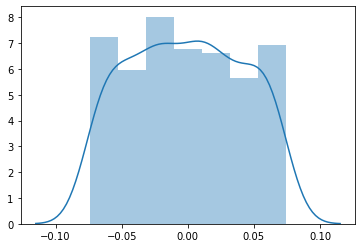

In [13]:
# Data distribution of the weights
sns.distplot(weights[0])

plt.show()

#### Observation 
- We can notice the normal distribution in the weights.

## Compiling the model

In [14]:
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer=tf.keras.optimizers.SGD(), 
              metrics=['accuracy'])

#### Observation

- **loss = 'sparse_categorical_crossentropy'** is equivalent to **loss = tf.keras.losses.sparse_categorical_crossentropy**. <br> **optimizer='sgd'** is equivalent to **optimizer=tf.keras.optimizers.SGD()**. <br> **metrics=['accuracy']** is equivalent to **metrics=[tf.keras.metrics.sparse_categorical_accuracy]**

- We are using **sparse_categorical_crossentropy** for the loss function because the target variable is comprised of sparse labels. For instance, each y_train is between 0 and 9.<br> However if we had target probability for each label such as one-hot vector labels [0., 0., 0., 1., 0., 0., 0., 0., 0.] then we would have taken **categorical_crossentropy** as loss function instead.<br>In order to convert sparse labels to on-hot vector labels we should use **tf.keras.utils.to_categorical()** function.<br> In order to convert on-hot vector labels to sparse labels we **numpy.argmax(..., axis=1)** function.

- For binary classification the activation function for the output layer would be **sigmoid** and we would use the **binary_crossentropy** as loss function.

In [15]:
BATCH_SIZE = 32
EPOCHS = 100


class Callback_MNIST(tf.keras.callbacks.Callback):  
    def __init__(self, threshold):
        super(Callback_MNIST, self).__init__()
        self.threshold = threshold
        
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('loss') <= self.threshold) and (logs.get('val_loss') <= self.threshold) :
            print('\nTraining is cancelled. We reached the point')
            self.model.stop_training = True
        

callbacks = Callback_MNIST(threshold=0.4)

# Write TensorBoard logs to `./jpt_sample_logs` directory
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir='jpt_sample_logs')


history = model.fit(X_train, 
                    y_train, 
                    epochs=EPOCHS,
                    batch_size= BATCH_SIZE, 
                    validation_data=(X_valid, y_valid),
                    callbacks=[callbacks,tensorboard_callback])


Train on 55000 samples, validate on 5000 samples
Epoch 1/100
55000/55000 [==============================] - 4s 77us/sample - loss: 0.7043 - accuracy: 0.7687 - val_loss: 0.5256 - val_accuracy: 0.8246
Epoch 2/100
55000/55000 [==============================] - 4s 72us/sample - loss: 0.4841 - accuracy: 0.8316 - val_loss: 0.4415 - val_accuracy: 0.8496
Epoch 3/100
55000/55000 [==============================] - 4s 72us/sample - loss: 0.4393 - accuracy: 0.8453 - val_loss: 0.4119 - val_accuracy: 0.8524
Epoch 4/100
55000/55000 [==============================] - 4s 77us/sample - loss: 0.4135 - accuracy: 0.8546 - val_loss: 0.3971 - val_accuracy: 0.8602
Epoch 5/100
54432/55000 [============================>.] - ETA: 0s - loss: 0.3933 - accuracy: 0.8620
Training is cancelled. We reached the point
55000/55000 [==============================] - 4s 70us/sample - loss: 0.3927 - accuracy: 0.8622 - val_loss: 0.3792 - val_accuracy: 0.8670


#### Observation
- We could have set **validation_split** instead of using using validation set
  - validation_split=0.1 tells keras to use 10% of training data as validation


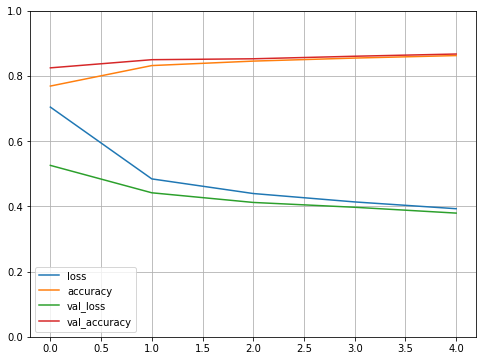

In [16]:
pd.DataFrame(history.history).plot(figsize=(8, 6))
plt.grid(True)
plt.gca().set_ylim(0, 1) 
plt.legend(loc='best')

plt.show()

#### Observation
- The validation and training curves are close to eachother whcih means there is not too much of a overfitting issue.

- It seems that the training and validations loss keep decreasing which means we prabably need to train the model with more epochs to converge

- we can tune the hyperparameters such as using a different optimizer with different learning rates. If it does not satisfy us we can modify the number of hidden layers, number of neurons per layers or even use a dfferent activation function for each hidden layer. We can also tune the number of batch_size.

In [17]:
%tensorboard --logdir jpt_sample_logs

<br>

<br>

## Evaluating the model

In [26]:
evaluation = model.evaluate(X_test, y_test)

print(f'Model accuracy: {evaluation[1]}')
print(f'Model loss: {evaluation[0]}')

10000/10000 [==============================] - 0s 37us/sample - loss: 76.0866 - accuracy: 0.8155
Model accuracy: 0.815500020980835
Model loss: 76.08656077880859


<br>

<br>

## Model predcition

In [46]:
X_new_images = X_test[:3]

In [47]:
y_proba = model.predict(X_new_images)

y_proba

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

#### Observation
- For each class, the predict one probability

<br>

In [48]:
X_pred_classes = model.predict_classes(X_new_images)

print(X_pred_classes)
print(np.array(class_names)[X_pred_classes])

[9 2 1]
['Ankle boot' 'Pullover' 'Trouser']


#### Observation
- Print the class with the highest estimated probability among 9 different classes

<br>

['Ankle boot' 'Pullover' 'Trouser'] 



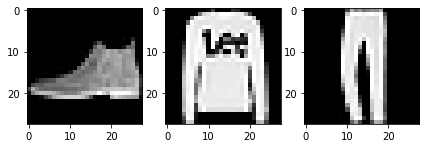

In [64]:
plt.figure(figsize=(12,10))
columns = 5

print(np.array(class_names)[X_pred_classes], '\n')

for i,image in enumerate(X_new_images):
    plt.subplot(len(X_new_images) / columns + 1, columns, i + 1)
    plt.imshow(image, cmap='gray')

---